#### Problem statement.
This project investigates whether it rains more in Seattle, WA than in New York, NY. Because rains more can be ambiguous, I evaluate based on how frequently it rain and the avarage daily precipitation (inches) by month

Using daily precipitation data over the same time window and only one station for both cities, I clean and join the datasets, create derived variables for analysis like day_of_month to able to calculate the mean for the specific day and use the value for missing value, visualize seasonal patterns, and conduct statistical tests that compare mean daily precipitation and the proportion of rainy days. The results provide an evidence-based answer that distinguishes between raining more often and raining more per event.

> Load Libraries
We start by importing the core libraries for data analysis and visualization. Pandas will be used for handling data, Numpy will be used for calculation methods, and Matplotlib/Seaborn will support charting.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# seaborn is a data visualization library built on matplotlib
import seaborn as sns

# set the plotting style
sns.set_style("whitegrid")

Load cleaned data.

In [3]:
df = pd.read_csv('../data/clean_seattle_newyork_weather.csv') 

In [4]:
type(df)

pandas.core.frame.DataFrame

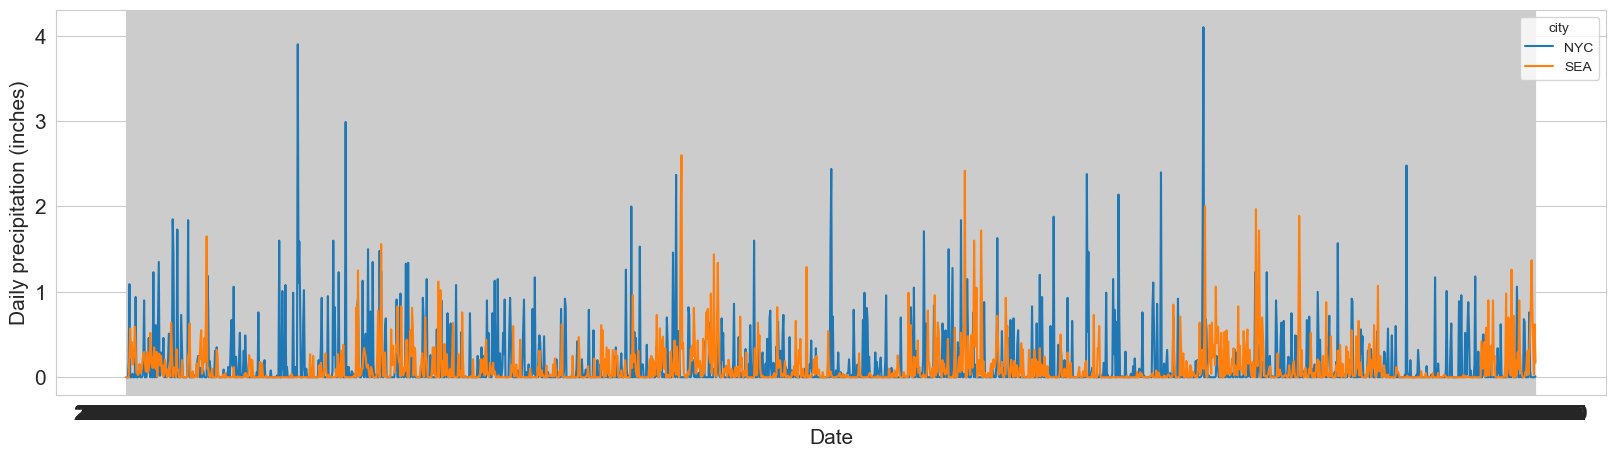

In [5]:
plt.figure(figsize=(20, 5))

sns.lineplot(data=df, x='date', y='precipitation', hue='city')

plt.xlabel('Date', fontsize=15)
plt.ylabel('Daily precipitation (inches)', fontsize=15)

plt.tick_params(labelsize=15)

plt.show()

The plot show how much rain in each cities from begining of 2018 until end of 2022, then we compute basic numerical summaries for precipitation in each city

In [6]:
df[['city', 'precipitation']].groupby('city').describe()

precipitation                                               
             count      mean       std  min  25%   50%   75%  max
city                                                             
NYC         1826.0  0.146154  0.356231  0.0  0.0  0.00  0.09  4.1
SEA         1826.0  0.113270  0.240516  0.0  0.0  0.01  0.12  2.6

We then have the overall summaries information on the precipitation. Compare mean precipitation values averaged over all days

In [7]:
df[['city', 'precipitation']].groupby('city').mean()

,precipitation
city,
NYC,0.146154
SEA,0.113270


From the mean, we can see that Seattle has lower value than other cities. Show the values as a bar graph

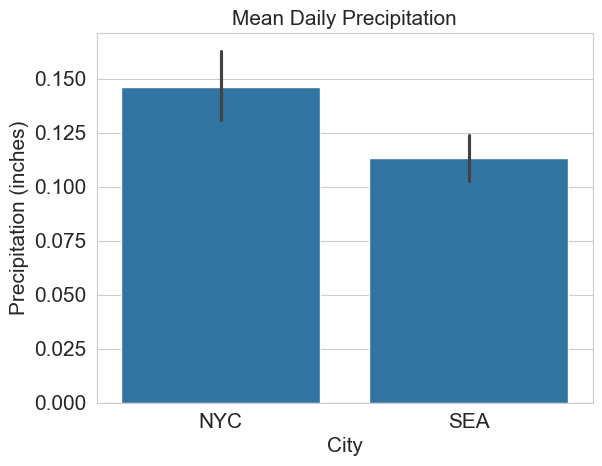

In [8]:
sns.barplot(data=df, x='city', y='precipitation')

plt.ylabel('Precipitation (inches)', fontsize=15)
plt.xlabel('City', fontsize=15)
plt.title('Mean Daily Precipitation', fontsize=15)

plt.tick_params(labelsize=15)

plt.show()

The graph show more visualize how other cities has higher mean than Seattle with the error bar. Add a column to the data frame with the number of the month

In [9]:
df['month'] = pd.DatetimeIndex(df['date']).month
df.head()

,date,city,precipitation,day_of_year,month
0,2018-01-01,NYC,0.00,1,1
1,2018-01-02,NYC,0.00,2,1
2,2018-01-03,NYC,0.00,3,1
3,2018-01-04,NYC,0.17,4,1
4,2018-01-05,NYC,1.09,5,1


In [10]:
df['month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int32)

Now we have extract the month for each records for more visualization. Plot the distribution of precipitation amounts each month using boxplots

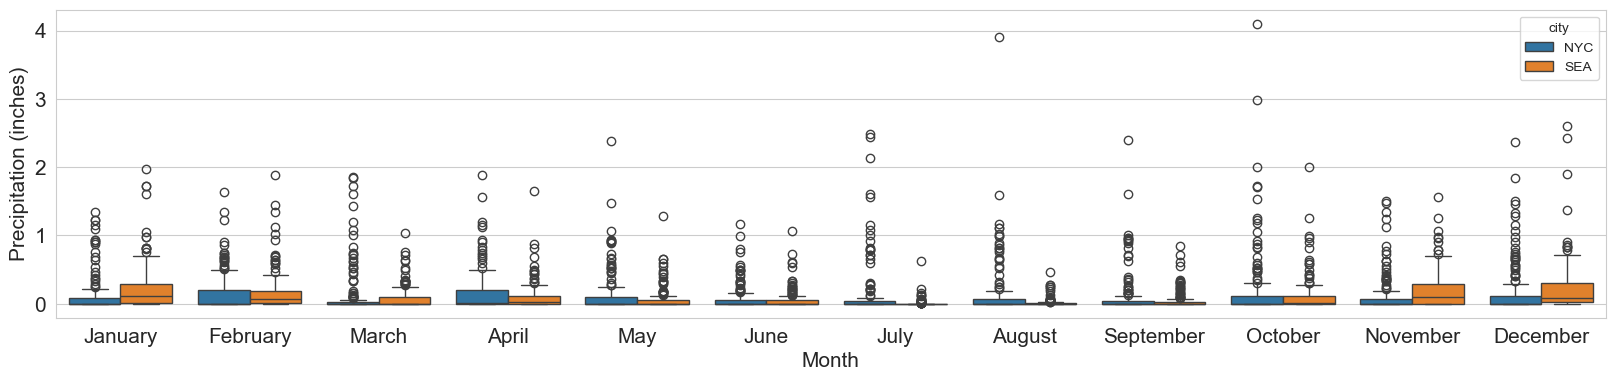

In [11]:
plt.figure(figsize=(20, 4))

sns.boxplot(data=df, x='month', y='precipitation', hue='city')

plt.xlabel('Month', fontsize=15)
plt.ylabel('Precipitation (inches)', fontsize=15)

plt.tick_params(labelsize=15)

#get month names and set as x-axis tick labels
import calendar
month_names = list(calendar.month_name[1:]) # Get month names
plt.xticks(ticks=range(12), labels=month_names) # Set x-axis ticks to month names

plt.show()

Orient the plot horizontally for easier visual

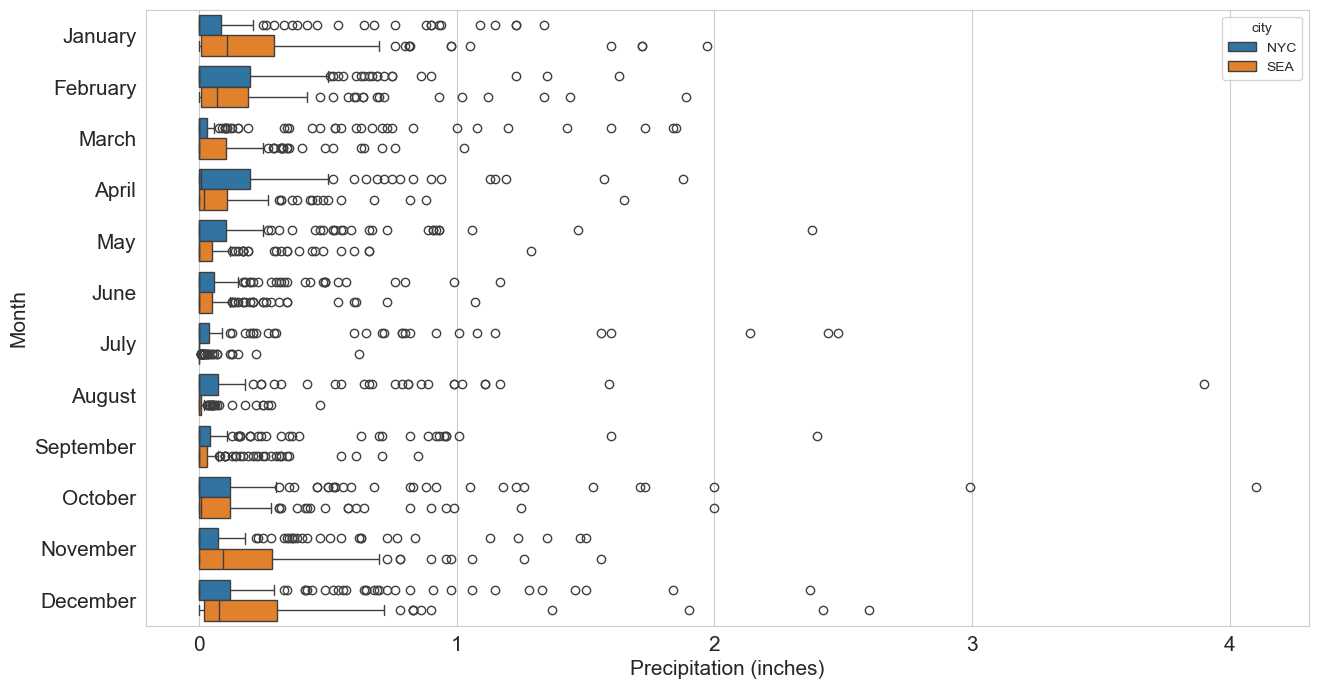

In [12]:
plt.figure(figsize=(15, 8))

sns.boxplot(data=df, x='precipitation', y='month', hue='city', orient='h')

plt.xlabel('Precipitation (inches)', fontsize=15)
plt.ylabel('Month', fontsize=15)

plt.tick_params(labelsize=15)

plt.yticks(ticks=range(12), labels=month_names)

plt.show()

Zoom in on the precipiation axis

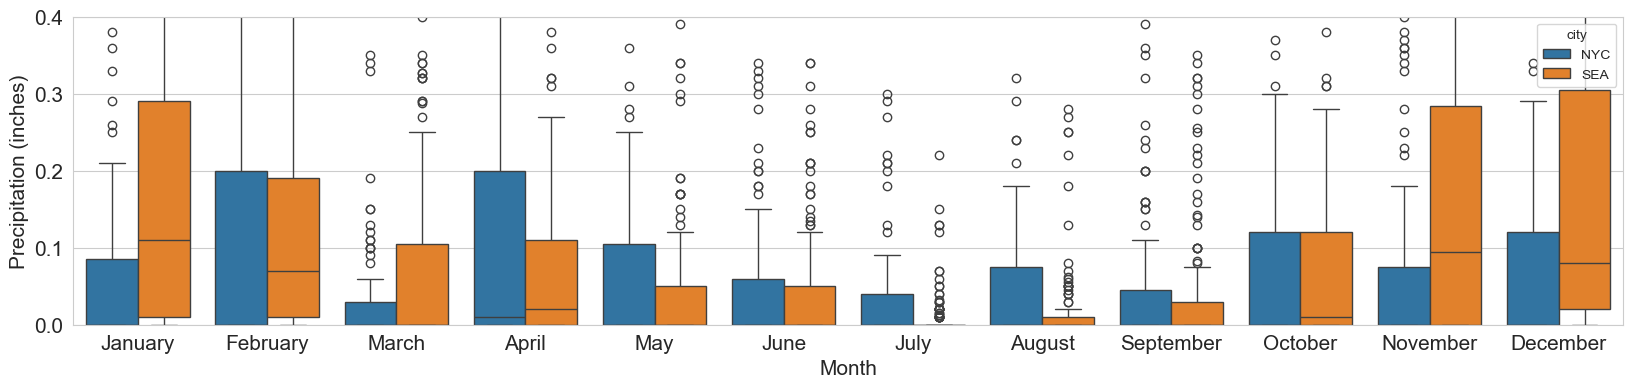

In [13]:
plt.figure(figsize=(20, 4))

sns.boxplot(data=df, x='month', y='precipitation', hue='city')

plt.xlabel('Month', fontsize=15)
plt.ylabel('Precipitation (inches)', fontsize=15)

plt.tick_params(labelsize=15)

plt.xticks(ticks=range(12), labels=month_names)

plt.ylim(0, 0.4)

plt.show()

Plot the mean precipitation each month

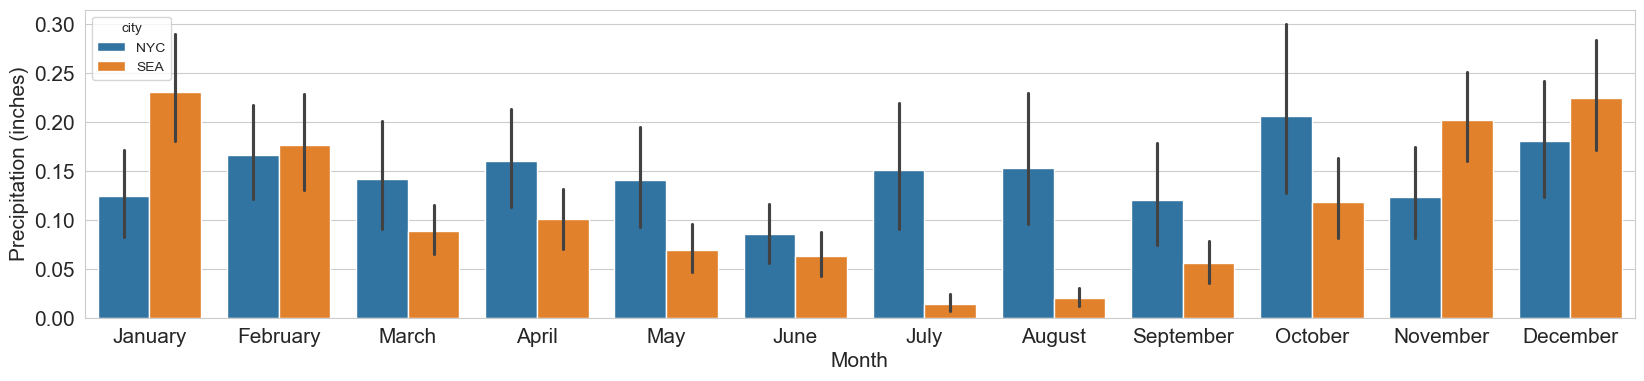

In [14]:
plt.figure(figsize=(20, 4))

sns.barplot(data=df, x='month', y='precipitation', hue='city')

plt.xlabel('Month', fontsize=15)
plt.ylabel('Precipitation (inches)', fontsize=15)

plt.tick_params(labelsize=15)

plt.xticks(ticks=range(12), labels=month_names)

plt.show()

The graph shows that NYC has stable precipitation data acorss the months. then we compute the mean precipitation each month

In [15]:
df[['month', 'precipitation', 'city']].groupby(['city', 'month']).mean()

precipitation
city month               
NYC  1           0.124387
     2           0.166312
     3           0.141790
     4           0.160267
     5           0.140516
     6           0.085400
     7           0.150774
     8           0.153161
     9           0.119867
     10          0.206129
     11          0.123667
     12          0.180323
SEA  1           0.230742
     2           0.176472
     3           0.089075
     4           0.100483
     5           0.069161
     6           0.063167
     7           0.013984
     8           0.019995
     9           0.055622
     10          0.118452
     11          0.201867
     12          0.224903

Plot the proportion of days with any precipitation

In [16]:
df['any_precipitation'] = df['precipitation'] > 0
df.head()

,date,city,precipitation,day_of_year,month,any_precipitation
0,2018-01-01,NYC,0.00,1,1,False
1,2018-01-02,NYC,0.00,2,1,False
2,2018-01-03,NYC,0.00,3,1,False
3,2018-01-04,NYC,0.17,4,1,True
4,2018-01-05,NYC,1.09,5,1,True


Now each oversavations have additional variable that show it is rain or not. Then we plot the proportion of days with any precipitation over the 5 years

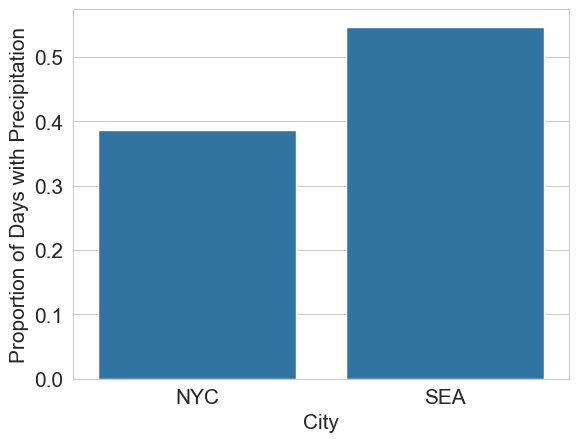

In [17]:
sns.barplot(data=df, x='city', y='any_precipitation', errorbar=None)

plt.xlabel('City', fontsize=15)
plt.ylabel('Proportion of Days with Precipitation', fontsize=15)

plt.tick_params(labelsize=15)

plt.show()

From this bar graph, we know that Seattle has more percentages that a day has more chance to rain than New York. Lets plot the proportion of days with precipitation each month.

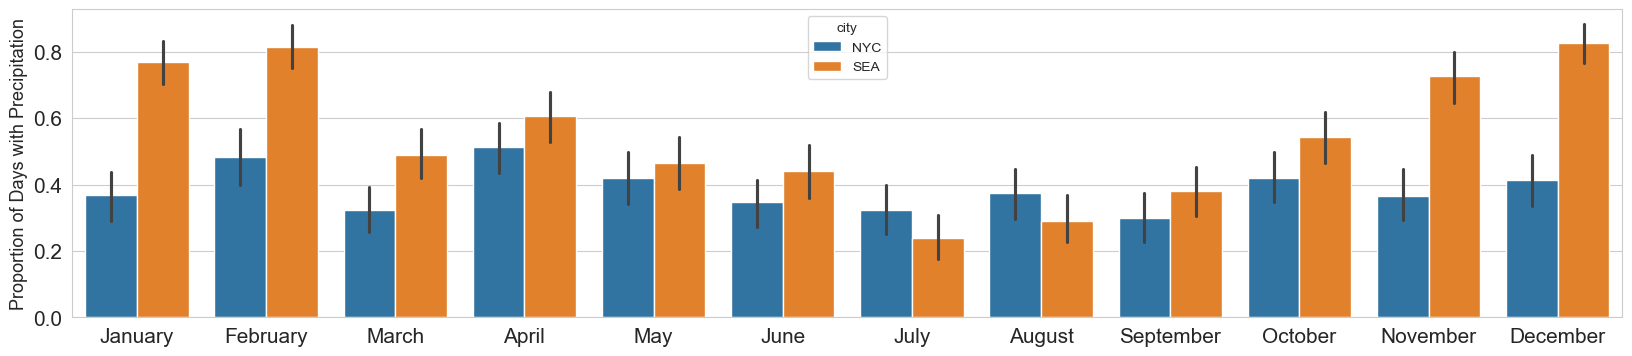

In [18]:
plt.figure(figsize=(20, 4))
sns.barplot(data=df, x='month', y='any_precipitation', hue='city')

plt.xlabel(None)
plt.ylabel('Proportion of Days with Precipitation', fontsize=13)
plt.xticks(ticks=range(12), labels=month_names)
plt.tick_params(labelsize=15)

plt.show()

This graph shows that Seattle have more raining days than New York, then perform a statistical test for differences in the mean precipitation each month between the cities

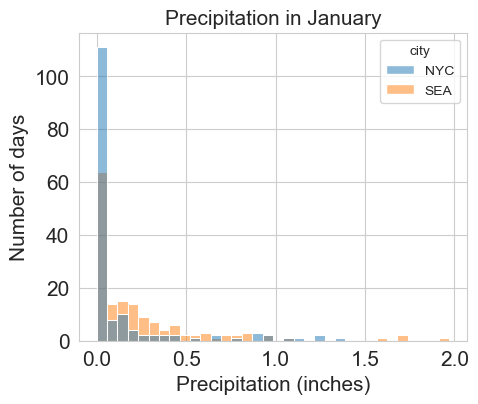

In [19]:
plt.figure(figsize=(5,4))

sns.histplot(data=df.loc[df['month'] == 1], x='precipitation', hue='city')

plt.xlabel('Precipitation (inches)', fontsize=15)
plt.ylabel('Number of days', fontsize=15)
plt.title('Precipitation in January', fontsize=15)

plt.tick_params(labelsize=15)

plt.show()

In [20]:
from scipy import stats

In [23]:
significance_level = 0.05
significantly_different = np.zeros(12)

for month in range(1, 13):
  sea_data = df.loc[(df['city'] == 'SEA') & (df['month'] == month), 'precipitation']
  nyc_data = df.loc[(df['city'] == 'NYC') & (df['month'] == month), 'precipitation']
  
  t_statistic, p_value = stats.ttest_ind(sea_data, nyc_data, equal_var=False)
  
  if p_value < significance_level:
    significantly_different[month-1] = 1
    
  print(f"Month {month}:")
  print(f"  t-statistic = {t_statistic:.2f}")
  print(f"  p-value t test = {p_value:.3f}")
  print("-" * 20)

Month 1:
  t-statistic = 2.99
  p-value t test = 0.003
--------------------
Month 2:
  t-statistic = 0.29
  p-value t test = 0.774
--------------------
Month 3:
  t-statistic = -1.64
  p-value t test = 0.102
--------------------
Month 4:
  t-statistic = -1.98
  p-value t test = 0.049
--------------------
Month 5:
  t-statistic = -2.48
  p-value t test = 0.014
--------------------
Month 6:
  t-statistic = -1.13
  p-value t test = 0.259
--------------------
Month 7:
  t-statistic = -4.00
  p-value t test = 0.000
--------------------
Month 8:
  t-statistic = -3.87
  p-value t test = 0.000
--------------------
Month 9:
  t-statistic = -2.25
  p-value t test = 0.025
--------------------
Month 10:
  t-statistic = -1.84
  p-value t test = 0.067
--------------------
Month 11:
  t-statistic = 2.40
  p-value t test = 0.017
--------------------
Month 12:
  t-statistic = 1.02
  p-value t test = 0.307
--------------------


Now that we have the p_value to show which months are actually significant differences. Then we plot the mean precipitation each month with a star for significant differences

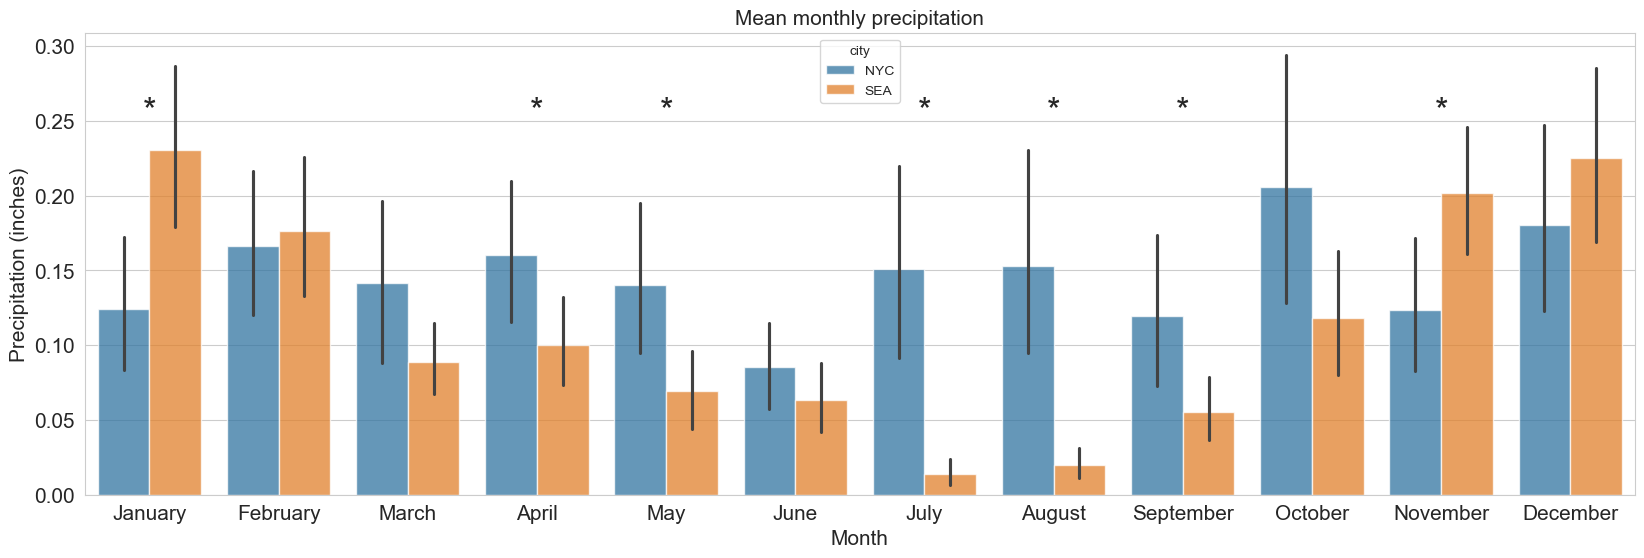

In [30]:
plt.figure(figsize=(20, 6))

sns.barplot(data=df, x='month', y='precipitation', hue='city', alpha=0.75)

plt.xlabel('Month', fontsize=15)
plt.ylabel('Precipitation (inches)', fontsize=15)
plt.title('Mean monthly precipitation', fontsize=15)

plt.tick_params(labelsize=15)
plt.xticks(ticks=range(12), labels=month_names)

for month in range(12):
  if significantly_different[month] == 1:
    plt.text(month, 0.25, '*', ha='center', fontsize=25)
    
plt.show()

The graph shows which months are truly significant differences that we can see New York has significant differences from mid-spring until fall. So I think New York has more rain like storm than Seattle. Next, we perform a statistical test for differences in the proportion of days with any precipitaion each month between the cities

In [25]:
from statsmodels.stats.proportion import proportions_ztest

In [26]:
significantly_different_proportion = np.zeros(12)

for month in range(1, 13):
  contingency_table = pd.crosstab(
    df.loc[df['month'] == month, 'city'], df.loc[df['month'] == month, 'any_precipitation']
  )
  
  days_with_precipitation = contingency_table[True]
  
  total_counts = contingency_table.sum(axis=1)
  
  zstat, p_value = proportions_ztest(
    count=days_with_precipitation, nobs=total_counts, alternative='two-sided'
  )
  
  if p_value < significance_level:
    significantly_different_proportion[month - 1] = 1
    
  print(f"Month {month}:")
  print(f"  z-statistic = {zstat:.2f}")
  print(f"  p-value t test = {p_value:.3f}")
  print("-" * 20)

Month 1:
  z-statistic = -7.11
  p-value t test = 0.000
--------------------
Month 2:
  z-statistic = -5.86
  p-value t test = 0.000
--------------------
Month 3:
  z-statistic = -3.01
  p-value t test = 0.003
--------------------
Month 4:
  z-statistic = -1.63
  p-value t test = 0.103
--------------------
Month 5:
  z-statistic = -0.80
  p-value t test = 0.423
--------------------
Month 6:
  z-statistic = -1.65
  p-value t test = 0.098
--------------------
Month 7:
  z-statistic = 1.64
  p-value t test = 0.100
--------------------
Month 8:
  z-statistic = 1.57
  p-value t test = 0.117
--------------------
Month 9:
  z-statistic = -1.46
  p-value t test = 0.144
--------------------
Month 10:
  z-statistic = -2.16
  p-value t test = 0.031
--------------------
Month 11:
  z-statistic = -6.26
  p-value t test = 0.000
--------------------
Month 12:
  z-statistic = -7.49
  p-value t test = 0.000
--------------------


Now we have the p-value calculated based on the any_precipitation variable so it only calculate for the day that actual rain, Next lets plot the proportion of days with any precipitation each month with a star for significant diffences for visualization which months are significant different

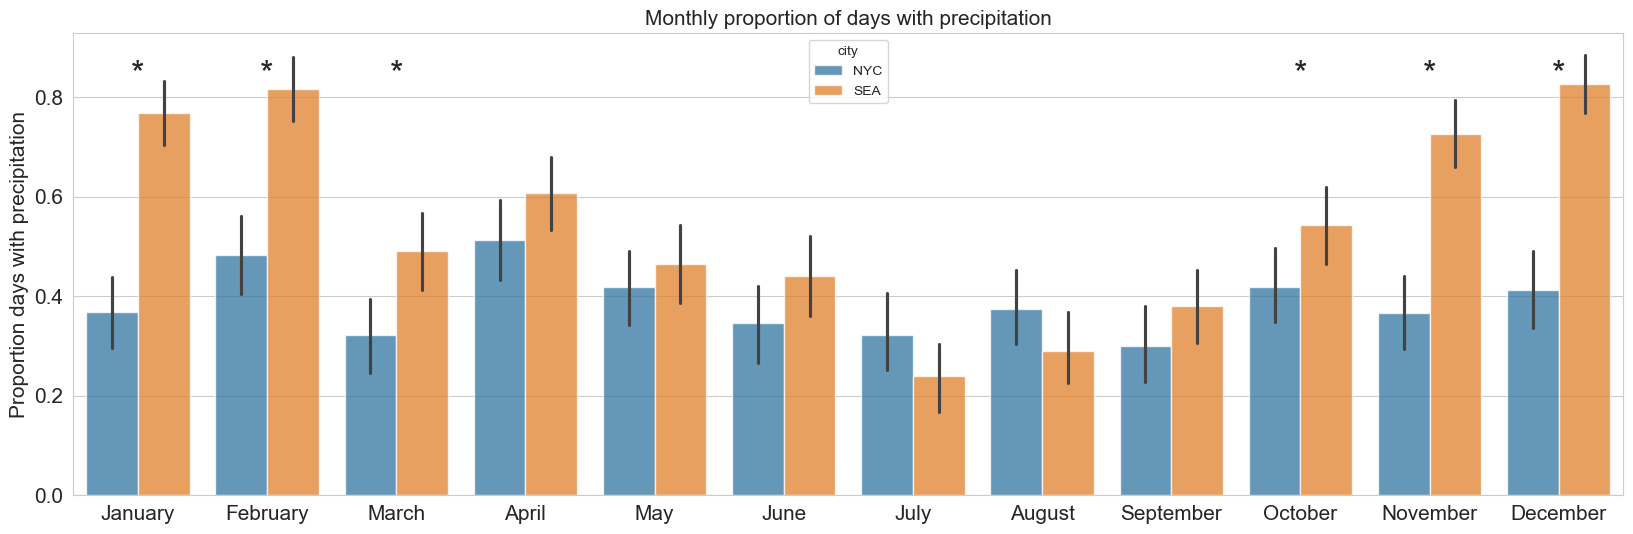

In [27]:
plt.figure(figsize=(20, 6))

sns.barplot(data=df, x='month', y='any_precipitation', hue='city', alpha=0.75)

plt.xlabel(None)
plt.ylabel('Proportion days with precipitation', fontsize=15)
plt.title('Monthly proportion of days with precipitation', fontsize=15)

plt.tick_params(labelsize=15)
plt.xticks(ticks=range(12), labels=month_names)

for month in range(12):
  if significantly_different_proportion[month] == 1:
    plt.text(month, 0.825, '*', ha='center', fontsize=25)
    
plt.show()

From the graph above, it shows that Seattle has significant different in Winter and Spring than New York using data that only days has precipitation.